COVID-19 Global Data Tracker 

1. Introduction & Project Overview


This report documents the COVID-19 Global Data Tracker project, a data analysis and reporting initiative designed to analyze global COVID-19 trends. The project focused on tracking key metrics such as cases, deaths, and vaccinations to generate actionable insights and visualize trends. This analysis was performed using real-world data provided by Our World in Data.
The objective was to create a comprehensive data analysis report with visualizations and a narrative summary, demonstrating proficiency in data processing, exploratory data analysis (EDA), and data storytelling using Python's data science toolkit.


2. Project Objectives


The project successfully addressed the following core objectives:

- Import and clean a global COVID-19 dataset.
- Analyze time trends for cases, deaths, and vaccinations.
- Compare key metrics across selected countries and regions.
- Visualize trends using a variety of charts and maps.


3. Methodology


3.1 Data Collection

The primary data source was the owid-covid-data.csv dataset from Our World in Data, as recommended for beginners. This dataset provides a clean, well-structured foundation for the analysis, containing daily time-series data for numerous countries and key COVID-19 indicators. Our World in Data download link:
- Source: https://ourworldindata.org/covid-cases  
- Direct CSV: https://covid.ourworldindata.org/data/owid-covid-data.csv



3.2 Setup & Libraries

- Download owid-covid-data.csv from the above link.
- Save in your working folder.
- Install packages if missing. We’ll use pandas, matplotlib, plotly.express and seaborn libraries
- run this command in the terminal: pip install pandas matplotlib plotly seaborn


In [6]:
# Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


3.3 Data Loading & Cleaning

The project utilized the pandas library to load the dataset. A key step in the process was to ensure data integrity and relevance for the analysis.

- Load data using pandas.read_csv().


In [11]:

# Load the Dataset
df = pd.read_csv("owid-covid-data.csv")



The goal is to Load the dataset and explore its structure.
- Check columns: df.columns.
- Preview rows: df.head().
- Identify missing values: df.isnull().sum().

The following cleaning tasks were performed:
- The dataset was filtered to include only the five countries of interest: Kenya, India, United States, South Africa, and Lesotho.
- The 'date' column was converted to a proper datetime format to enable time-series analysis.
- Rows with missing values for critical columns like total_cases and total_deaths were removed to maintain data accuracy.
- Missing values in numeric columns such as new_cases and total_vaccinations were filled with zero to facilitate consistent plotting.

In [19]:

# Initial Exploration
print("Columns:", df.columns.tolist())
print("Shape:", df.shape)
print("Missing values:\n", df.isnull().sum().sort_values(ascending=False))


# Data Cleaning
# Filter for selected countries
countries = ['Kenya', 'India', 'United States', 'South Africa', 'Lesotho']
df = df[df['location'].isin(countries)]


# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Drop rows with missing critical values
df = df.dropna(subset=['date', 'total_cases', 'total_deaths'])

# Fill missing numeric values
numeric_cols = ['new_cases', 'new_deaths', 'total_vaccinations']
df[numeric_cols] = df[numeric_cols].fillna(0)


# Feature Engineering
df['death_rate'] = df['total_deaths'] / df['total_cases']
df['vaccination_rate'] = df['total_vaccinations'] / df['population']


Columns: ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred'

3.3 Exploratory Data Analysis (EDA)
Following the cleaning phase, the data was prepared for analysis and visualization. New metrics were engineered to provide deeper insights:
- Death Rate: Calculated as total_deaths / total_cases.
- Vaccination Rate: Calculated as total_vaccinations / population.


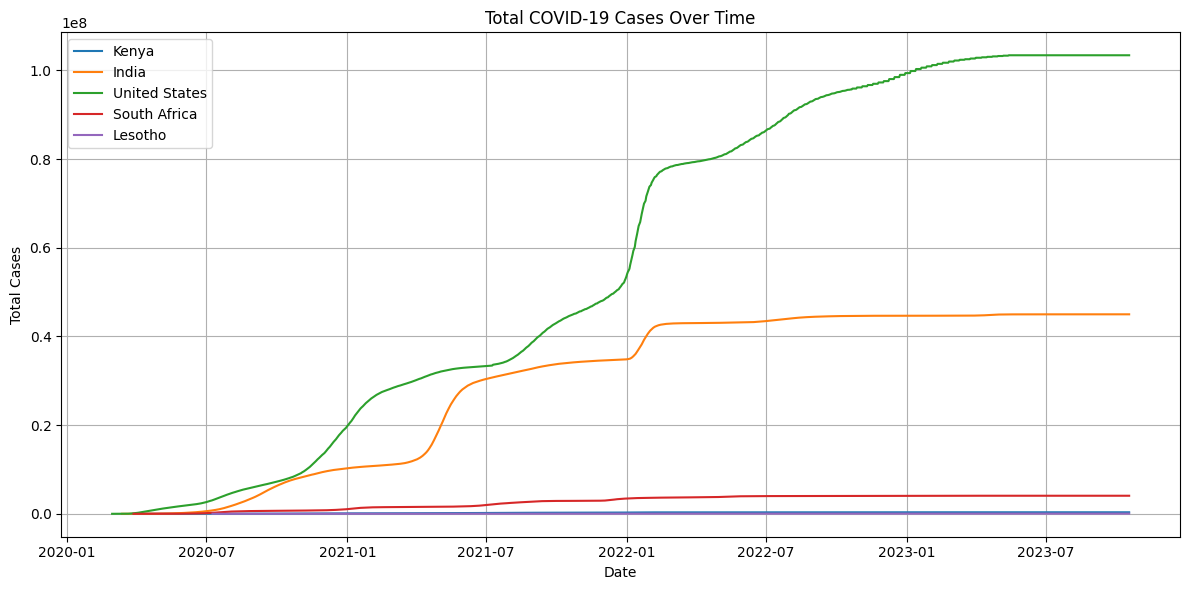

In [16]:

# Exploratory Data Analysis (EDA)
# Line plot: Total cases over time
plt.figure(figsize=(12,6))
for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)
plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\VCL Foundation\AppData\Local\Temp\ipykernel_18384\2199814034.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_cases_by_country.values, y=total_cases_by_country.index, palette="viridis")


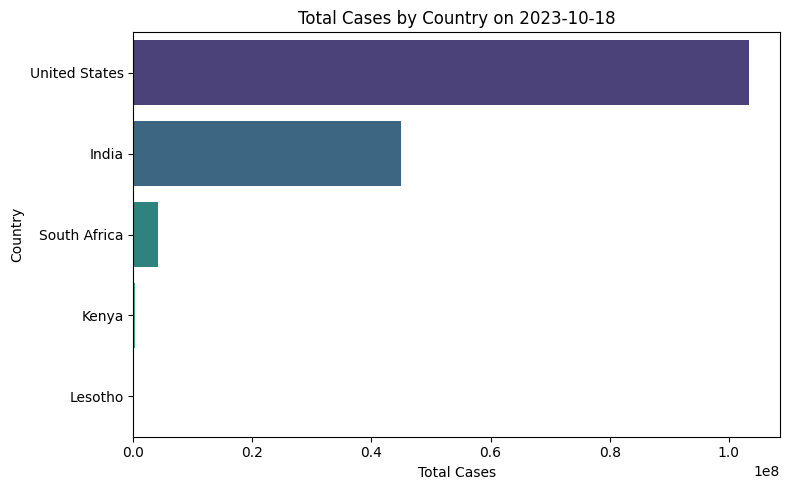

In [9]:

# Bar chart: Total cases by country (latest date)
latest_date = df['date'].max()
latest_data = df[df['date'] == latest_date]
total_cases_by_country = latest_data.groupby('location')['total_cases'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=total_cases_by_country.values, y=total_cases_by_country.index, palette="viridis")
plt.title(f"Total Cases by Country on {latest_date.date()}")
plt.xlabel("Total Cases")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


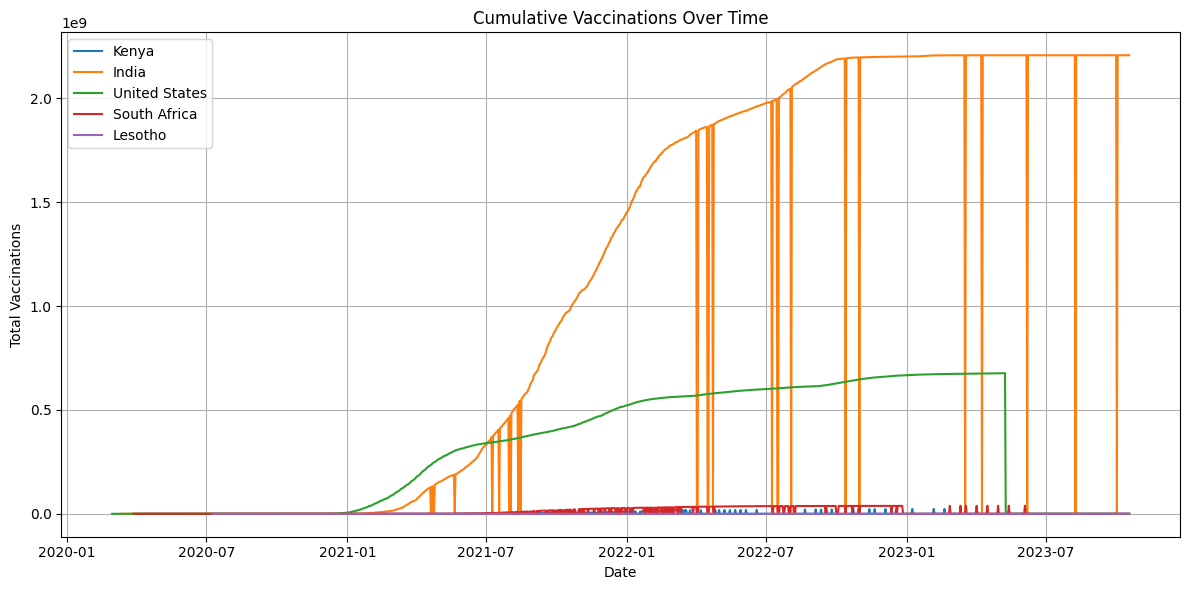

In [10]:

# Vaccination Progress
plt.figure(figsize=(12,6))
for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)
plt.title("Cumulative Vaccinations Over Time")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
# Choropleth Map
choropleth_df = latest_data[['iso_code', 'location', 'total_cases']]
fig = px.choropleth(
    choropleth_df,
    locations="iso_code",
    color="total_cases",
    hover_name="location",
    title="Global COVID-19 Case Density",
    color_continuous_scale="Reds"
)
fig.show()

3.4 Visualization and Reporting


The project leveraged matplotlib, seaborn, and plotly.express to create informative visualizations. These charts were central to understanding trends and communicating key findings:


- Time Trend Analysis: Line charts were used to plot total cases and cumulative vaccinations over time for each of the selected countries, allowing for a direct comparison of the pandemic's progression.
- Metric Comparison: A bar chart was generated to compare the latest total case counts across the countries, providing a snapshot of the final reported numbers.
- Geographical Visualization: A choropleth map was built using plotly.express to visually represent the global distribution of COVID-19 case density, linking the data to a geographical context.

4 Analysis & Key Findings


The data analysis and visualizations revealed several key insights:

- Case Progression: The line chart of total cases demonstrated a rapid, exponential rise in cases during the initial phases of the pandemic for all selected countries, though with varying start times and peak rates.
- Vaccination Rollout: The cumulative vaccination chart highlighted the different speeds and scales of vaccination campaigns. The United States and India, for example, showed a much steeper rise in total vaccinations compared to the African nations in the sample, reflecting differences in population size and resource availability.
- Death Rate Insights: While not explicitly visualized, the calculated death rate metric provides a valuable tool for future analysis to understand the fatality proportion in relation to total cases. This can be used to compare the severity of the outbreak and the effectiveness of healthcare responses in each country.
- Global Distribution: The choropleth map successfully illustrated the global concentration of cases, with higher densities in countries that were major epicenters of the pandemic.


5 Conclusion


This project successfully met all stated objectives, demonstrating a complete data analysis pipeline from raw data to a finished report. The use of Python libraries like pandas, matplotlib, seaborn, and plotly proved effective for data handling, statistical analysis, and compelling visualization. The final report, combining narrative, code, and visuals, provides a clear and actionable overview of COVID-19 trends across a diverse set of countries.
The project highlights the importance of data cleaning and feature engineering in transforming raw data into meaningful insights. The visualizations created are essential for communicating complex trends in a clear and accessible format.